# NLP CLASSIFIER

In [1]:
import pandas as pd

In [32]:
data = pd.read_csv('C:\\GUVI\\Placemnet Sepecial Class\\Project\\3_NLP\\news_data.csv')
data.head()


,headline,category
0,How a £525 bet gave birth to your morning commute,tech
1,"Entrepreneur, 10, dreams of helping parents re...",tech
2,School warning as explicit images shared to pu...,tech
3,"Boy, 6, makes YouTube channel on vegetarianism",tech
4,Oprah and Nigella deepfaked in influencer 'man...,tech


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  2877 non-null   object
 1   category  2877 non-null   object
dtypes: object(2)
memory usage: 45.1+ KB


In [34]:
data.duplicated().sum()

542

## Text Cleaning

In [35]:
import re
import string
from nltk.corpus import stopwords

In [36]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
def text_process(text):
    clean_rev = re.sub(r"\n","",text)
    clean_rev = [char for char in clean_rev if char not in string.punctuation]
    clean_rev = ''.join(clean_rev)
    clean_rev = " ".join(word for word in clean_rev.split() if word.lower() not in stopwords.words('english'))
    return clean_rev

In [38]:
data['cleaned_text'] = data['headline'].apply(text_process)


In [39]:
combined = " ".join(word for word in data['cleaned_text'])  
data.head()

,headline,category,cleaned_text
0,How a £525 bet gave birth to your morning commute,tech,£525 bet gave birth morning commute
1,"Entrepreneur, 10, dreams of helping parents re...",tech,Entrepreneur 10 dreams helping parents retire
2,School warning as explicit images shared to pu...,tech,School warning explicit images shared pupils
3,"Boy, 6, makes YouTube channel on vegetarianism",tech,Boy 6 makes YouTube channel vegetarianism
4,Oprah and Nigella deepfaked in influencer 'man...,tech,Oprah Nigella deepfaked influencer manifestati...


## Word Cloud

In [40]:
from textblob import TextBlob
from wordcloud import WordCloud

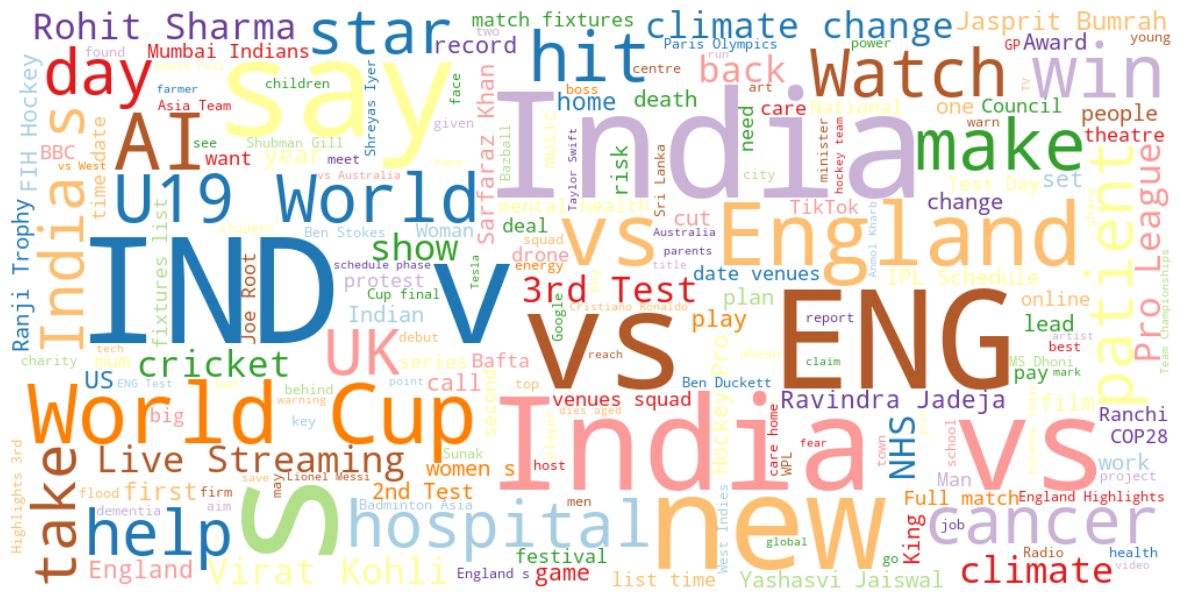

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
wordcloud = WordCloud(width=1000,height = 500,random_state=20,max_font_size=150,background_color= 'white',colormap='Paired_r').generate(combined)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Clustering

In [42]:
cluster_data = data.drop(['headline',"category"],axis=1)
cluster_data

,cleaned_text
0,£525 bet gave birth morning commute
1,Entrepreneur 10 dreams helping parents retire
2,School warning explicit images shared pupils
3,Boy 6 makes YouTube channel vegetarianism
4,Oprah Nigella deepfaked influencer manifestati...
...,...
2872,suspended WFI nationals wrestlers fix venue in...
2873,Divyansh Singh Panwar breaks 10m air rifle wor...
2874,U19 World Cup Arshin Kulkarni Naman Tiwary sta...
2875,Anatomy collapse Indian batting unravelled Sun...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans,KMeans
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_data.cleaned_text.values)
X

<2877x5960 sparse matrix of type '<class 'numpy.float64'>'
	with 23519 stored elements in Compressed Sparse Row format>

# Text Classification

In [44]:
print(data["category"].unique())

['tech' 'climate' 'health' 'entertainment' 'sport']


In [45]:
data['category'] = data['category'].str.strip()
mapping = {'climate': 0, 'entertainment': 1, 'health': 2, 'sport': 3, 'tech': 4}
data['category'] = data['category'].map(mapping)

In [46]:
X = vectorizer.fit_transform(data['cleaned_text'].values).toarray()
y = data['category']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [49]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for idx, accuracy in enumerate(accuracies):
    entries.append((model_name, idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'idx', 'accuracy'])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value

# Model Selection

In [50]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
mean_accuracy

model_name
LinearSVC                 0.811958
LogisticRegression        0.805705
MultinomialNB             0.731318
RandomForestClassifier    0.342025
Name: accuracy, dtype: float64

In [51]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [52]:
# Assuming your data is in bytes-like object format
# You may need to decode it into strings using the appropriate encoding
#decoded_documents = [doc.decode('utf-8') for doc in data]

# Now you can use CountVectorizer with the preprocessed data
#vectorizer.fit_transform(decoded_documents)


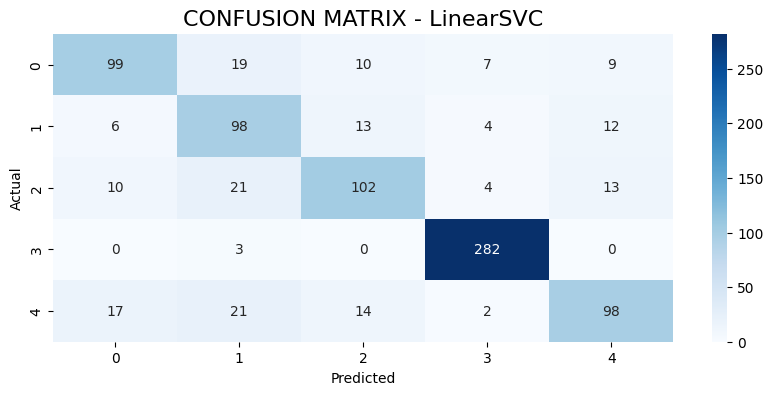

In [ ]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(conf_mat, annot=True,cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC", size=16);

# Predicting the Class

In [ ]:
text ='Wheezing widespread problem children 5 years old India According American Academy Paediatrics 50 children would least one episode wheezing 5 years age child wheezes first question happens one’s mind whether child asthma whether require medicines long duration article let’s discuss myths facts wheezing treatment children 5 yearsMyth 1 wheezing asthmaFact fact viral infections common cause wheezing children five years age 60 children experience recurrent wheezing age 5 stop wheezing won’t develop asthma age However there’s family history asthma allergyrelated skin disease child may continue wheeze even age 5Myth 2 Inhalers harmful addictive used childrenFacts Inhalers safe nonaddictive medication used children relieve control asthma symptoms long run considered lifeline wheezing children used firstline medication prescribed doctor instead syrups tablets recommendation supported international organizations Global Initiative Asthma GINA children age 5Myth 3 Inhalers used children similar given adults lead overdosageFact Aerosol delivery devices adults children However dosage frequency use may differ based age severity wheeze Also amount drug deposited lungs depends upon breathing capacity person Adult lungs handle air volume resulting medication deposited dosage Pediatric lungs smaller receive less medication important consult doctor appropriate dosage control symptomsMyth 4 Inhalers contain steroids harm child growth developmentFact Inhalers contain steroids microgram doses 1000 times less dose syrups tablet steroids given wheeze exacerbations Inhalers like ointments drug gets deposited surface action required oral medications taken get absorbed intestines blood resulting delivery drug body parts action intended Hence side effects inhalers less compared oral medicationsMyth 5 Inhalers used severe cases wheezingFact Inhalers medications relieve also prevent recurrent wheezing long run Even child mild persistent asthma symptoms controllable inhalers oral medications standard careMyth 6 Inhalers cure asthmaFact Inhaler medications classified two categories – relievers controllers Relievers used alleviate wheezing controllers given prevent recurrent wheezing children Asthma allergy managed medications avoidance triggers It’s important note control possible cure However previously mentioned article children experience wheezing age 5 affected allergies asthma symptoms may improve age 6Myth 7 Nebulizers better inhalers used homeFact Nebulizers helpful sick children difficulty breathing wheezing However children breathing problems inhalers enough provide relief safe use nebulizers home children 5 years old using home machines without oxygen lead decrease oxygen levels unconsciousness Instead inhalers used home improvement inhalers important consult pediatrician go emergency room treatmentIn conclusion wheezing children mostly due viral infections Inhalers safe effective way manage wheeze children 5 years age essential help build awareness inhalers form important way wheeze treated Parents caregivers consult child’s doctor ensure child using inhalers correctly effectively Dr Karthik Narayanan R MD Pediatrics DM Pediatric critical care Emergency MedicineSenior Consultant Rainbow Children’s Hospital ChennaiDr Karthik Narayanan RMD Pediatrics DM Pediatric critical care Emergency Medicine Senior Consultant Rainbow Children’s Hospital ChennaiDisclaimerThis content sponsored reflect views opinions IE Online Media Services Pvt Ltd journalist involved creating sponsored material imply endorsement whatsoever editorial team IE Online Media Services takes responsibility content appears sponsored articles consequences thereof directly indirectly manner Viewer discretion advised'

In [ ]:
vect_text = vectorizer.transform([text])
result = model.predict(vect_text)[0]

In [ ]:
# Print the predicted category based on the value in `result`
if result == 0:
    print("The text belongs to the category: climate")
elif result == 1:
    print("The text belongs to the category: entertainment")
elif result == 2:
    print("The text belongs to the category: health")
elif result == 3:
    print("The text belongs to the category: sport")
elif result == 4:
    print("The text belongs to the category: tech")
else:
    print("Invalid prediction result")


The text belongs to the category: health


# Saving the model as pickle file

In [ ]:
import pickle
with open('text_model.pkl','wb') as file:
    pickle.dump(model,file)